In [1]:
import thermo
from thermo.chemical import Chemical

In [2]:
import math
import fluids
from fluids.units import *
import numpy as np

Given:  Water at 60 degF is flowing from a reservoir through the piping system.  The reservoir has a constant head of 11.5 feet.
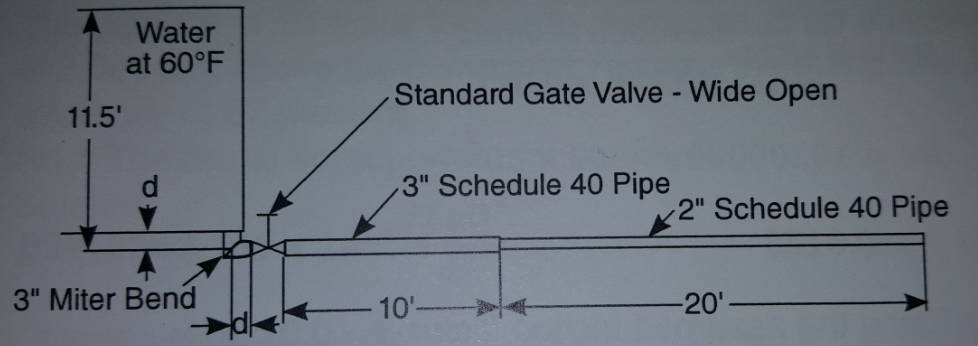

Find:  The flow rate in gallons per minute

In [3]:
d2 = (nearest_pipe(NPS=2*u.inch, schedule='40')[1]).to(u.inch)
d3 = (nearest_pipe(NPS=3*u.inch, schedule='40')[1]).to(u.inch)
T = (60*u.degF).to(u.degK)
P = (1*u.atmosphere).to(u.Pa)

water = Chemical('water', P=P.magnitude, T=T.magnitude)

mu = water.mu*1000*u.cP
rho = (water.rho*u.kg/u.meter**3).to(u.lb/u.feet**3)


ft_2inch = 0.019 #Crane 410, A-27
ft_3inch = 0.017 #Crane 410, A-27

beta = d2/d3

mu, rho, beta

(<Quantity(1.134622271808897, 'centipoise')>,
 <Quantity(62.46920305865831, 'pound / foot ** 3')>,
 <Quantity(0.6735112936344969, 'dimensionless')>)

Get the K values

In [4]:
Kentrance = 0.5 #3" entrance  Crane 410, A-30

Kmiter = 60*ft_3inch #Crane 410 A-30 for a 90 degree miter

Kgate = 8*ft_3inch #gate valve, Crane 410 A-28

L_3inch = 10*u.feet
D3 = d3.to(u.feet)
Kpipe_3inch = ft_3inch*L_3inch/D3

L_2inch = 20*u.feet
D2 = d2.to(u.feet)
Kpipe_2inch = ft_2inch*L_2inch/D2/beta**4  #beta to  express 2 inch in terms of 3 inch


Kexit = 1/beta**4 #Crane 410, A-30

#For sudden constraction, assuming theta is close to 90 deg for a sudden expansion
Kcontract = 0.5*(1-beta**2)*math.sqrt(math.sin(math.pi/2))/beta**4

print('entrance: {}\nmiter: {}\ngate valve: {}\
        \n3 inch pipe: {}\n2inch pipe: {}\nexit: {}\
        \ncontraction: {}'.format(Kentrance, Kmiter, Kgate, Kpipe_3inch, Kpipe_2inch, Kexit, Kcontract))
Ktot = np.sum([Kentrance, Kmiter, Kgate, Kpipe_3inch, Kpipe_2inch, Kexit, Kcontract])

print('total K:{:.2f}'.format(Ktot))

entrance: 0.5
miter: 1.02
gate valve: 0.136        
3 inch pipe: 0.6649897330595483 dimensionless
2inch pipe: 10.725689070080252 dimensionless
exit: 4.859823200699437 dimensionless        
contraction: 1.32766126572747 dimensionless
total K:19.23


In [5]:
hL = 11.5*u.feet
Q = (19.64*d3**2*math.sqrt(hL.magnitude/Ktot)).magnitude*u.gallons/u.minute
Q
#This solution assumes flow in fully turbulent zone 

<Quantity(142.9171045633805, 'gallon / minute')>

In [6]:
#Check Reynolds number and flow in friciton coefficient

Re = (50.66*Q*rho/(d3*mu)).magnitude*u.dimensionless


e_3inch = roughness_Farshad('Carbon steel, bare', D=d3.to(u.meter))

f_3inch = friction_factor(Re=Re, eD=e_3inch/d3.to(u.meter))

e_2inch = roughness_Farshad('Carbon steel, bare', D=d2.to(u.meter))

f_2inch = friction_factor(Re=Re, eD=e_2inch/d2.to(u.meter))

print('Re: {:.3e}\nf 3 inch: {:.3f}\nf 2inch: {:.3f}'.format(Re, f_3inch, f_2inch))


Re: 1.299e+05 dimensionless
f 3 inch: 0.019 dimensionless
f 2inch: 0.020 dimensionless


Since assumed friction factors used for straight pipe are not in agreement, the K factors for these items and the total system should be correct accordingly

In [7]:
#3 inch pipe
L_3inch = 10*u.feet
D3 = d3.to(u.feet)
Kpipe_3inch = f_3inch*L_3inch/D3

#2 inch pipe
L_2inch = 20*u.feet
D2 = d2.to(u.feet)
Kpipe_2inch = ft_2inch*L_2inch/D2/beta**4  #beta to  express 2 inch in terms of 3 inch

Ktot = np.sum([Kentrance, Kmiter, Kgate, Kpipe_3inch, Kpipe_2inch, Kexit, Kcontract])

print('total K:{:.2f}'.format(Ktot))

total K:19.33


Recalculate Q

In [8]:
hL = 11.5*u.feet
Q = (19.64*d3**2*math.sqrt(hL.magnitude/Ktot)).magnitude*u.gallons/u.minute
Q
#This solution assumes flow in fully turbulent zone 

<Quantity(142.56140525413377, 'gallon / minute')>